## Exercise 1

In [1]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *


(<Axes: title={'center': 'Original'}>, None)

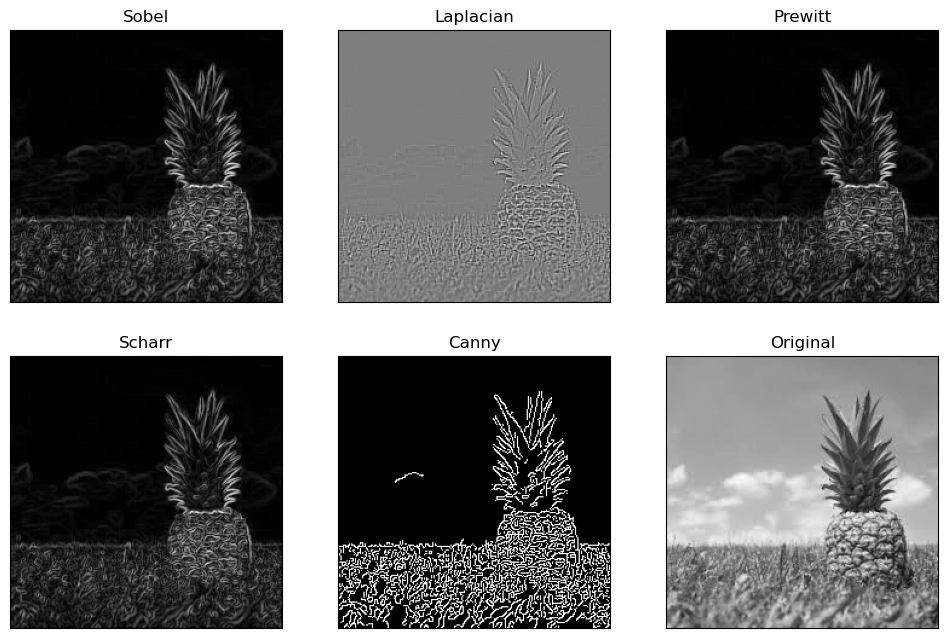

In [2]:
img = cv.imread('images/pineapple.jfif', 0)

kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])


# Apply different edge detectors
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=3)
prewitt_x = cv.filter2D(img,cv.CV_64F,  kernelx)
prewitt_y = cv.filter2D(img,cv.CV_64F, kernely)
scharr_x = cv.Scharr(img, cv.CV_64F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_64F, 0, 1)
canny = cv.Canny(img, 100, 200)

#Combine gradient info for sobel, prewitt, and scharr
sobel_combined = cv.magnitude(sobel_x, sobel_y)
prewitt_combined = cv.magnitude(prewitt_x, prewitt_y)
scharr_combined = cv.magnitude(scharr_x, scharr_y)

# Display the results
plt.figure(figsize=(12, 12))

plt.subplot(331), plt_img(sobel_combined, "Sobel")

plt.subplot(332), plt_img(laplacian, "Laplacian")

plt.subplot(333), plt_img(prewitt_combined, "Prewitt")

plt.subplot(334), plt_img(scharr_combined, "Scharr")

plt.subplot(335), plt_img(canny, "Canny")

plt.subplot(336), plt_img(img, "Original")



### Results
Sobel:
The Sobel operators show smooth edges,it is sensitive to noise, it can show the fine details of the pineapple well 

Laplacian:
Laplacian is sensitive to noise, it can detect the edges of the pineapple 

Prewitt:
The output is similar to sobel operators, it has smooth edges, and can show fine details of the pineapple

Scharr:
Scharr is also similar to sobel but it has slightly better noise performance. It outputs smooth edges. 

Canny:
The edges are outlined clearly, the clouds are almost all segmented away. But the grass is being detected which can disturb the pineapple image. 

## Exercise 2

In [3]:
img = cv.imread("images/electronic.jfif")
#blur the image
blur = cv.GaussianBlur(img, (3, 3), 0)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# threshold
th =cv.threshold(gray,200,255,cv.THRESH_BINARY)[1]

# find contour
contours,_ = cv.findContours(th,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#RETR_TREE will detect small objects too
#RETR_EXTERNAL will detect 1 large object

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    if w * h > 5000:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_img("contour", img)

## Exercise 3

In [5]:
img = cv.imread("images/clock.jpg")

In [6]:
def auto_canny(img, method,sigma=0.33):
    """Args:
    img: source grayscale image
    method: median, otsu, and triangle
    sigma: 0.33(default)"""
    if method == "median":
        Th = np.median(img)
        
    elif method == "triangle":
        Th=cv.threshold(img,0,255,cv.THRESH_TRIANGLE)[0]
        
    elif method == "otsu":
        Th=cv.threshold(img,0,255,cv.THRESH_OTSU)[0]
        
    else:
        raise Exeption("Method specified unavailable")
        
    lowTh = (1-sigma)*Th
    highTh = (1+sigma)*Th
    
    return cv.Canny(img, lowTh, highTh)

In [9]:
#resizing -> grayscale ->bilateral filtering -> edge detection -> contour
#-> contour features
factor = 300 / img.shape[1] #scale factor = output width / original image width
img = cv.resize(img, None,fx=factor,fy=factor)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.bilateralFilter(gray, 7,19,13)
edge = auto_canny(blur, method = "median")

show_img("edge",edge)

In [8]:
# find contour
contours,_ = cv.findContours(edge, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# sort contour with regards to area in descending order and take the first 5
contours = sorted(contours, key =cv.contourArea, reverse=True)[:5]
screen = None

for c in contours:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.1*peri,True)
    
    if len(approx) == 4:
        screen = c
        break
    
img_copy = img.copy()
cv.drawContours(img_copy, [screen], -1,(0,255,0),2)

show_img("screen", img_copy)